<a href="https://colab.research.google.com/github/RevazRevazashvili/TSU-python-labs/blob/main/Lab_7_Parallel_programming.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

გამოსადეგი ბმულები
1. https://docs.python.org/3/library/threading.html

#პარალელური პროგრამირება: პროცესები და thread-ები

thread

In [ ]:
"""
პროგრამული კოდი შედგება ინსტრუქციების მიმდევრობისგან. დროის გარკვეულ შუალედში
შესასრულებელი ინსტრუქციების ნაკრები შეიძლება დაიყოს ურთიერ დამოუკიდებელ და
ურთიერთქმედ ინსტრუქციებად. (ორ ან მეტ ინსტრუქციას ეწოდება ურთიერთ დამოუკიდებელი
თუ თითოეული მათგანის შესრულება არანაირ ზეგავლენას არ ახდენს სხვა დანარჩენი
ინსტრუქციების შესრულება. წინააღმდეგ შემთხვევაში ინსტრუქციებს ეწოდებათ ურთიერთქმედი.
მაგალითად, ინსტრუქციები a = 3 + 5 და b = 5 * 8 ურთიერთ დამოუკიდებელია, ხოლო
ინსტრუქციები a = 3 + 5 და b = 5 * a - კი არა.) თანამედროვე კომპიუტერების გამოთვლითი
შესაძლებლობებიდან გამომდინარე ურთიერთ დამოუკიდებელი ინსტრუქციები შეიძლება
შესრულდეს პარალელურად, რაც გამოიწვევს კოდის შესრულებას შესაბამის ფრაგმენტზე. კოდის
ურთიერთდამოუკიდებელი ინსტრუქციების პარალელური შესრულება შესაძლებელია
უზრუნველვყოთ thread-ების გამოყენებით.
პროგრამულ კოდში გამოყენებულ thread-ებს შეუძლიათ ერთობლივად გამოიყენონ
პროგრამის მონაცემები და რესურსები (ცვლადები, ფუნქციები და ა.შ.). ყოველ thread-ს პროცესის
მსგავსად გააჩნია საკუთარი ბრძანებათა მთვლელი, რეგისტრი და სტეკი. thread-ი დროის
ნებისმიერ მომენტში იმყოფება შემდეგი მდგომარეობებიდან ერთერთში (ნახ. 8.1):
• Ready (მზადყოფნა) - მდგომარეობა, რომელშიც გადადის სისტემაში გამოჩენილი thread-ი;
• Running (შესრულება) - მდგომარეობა, როდესაც thread-ი სრულდება პროცესორზე;
• Blocked (ბლოკირებული) - მდგომარეობა, რომლის დროსაც thread-ს არ შეუძლია შესრულება
გარკვეული რესურსის საჭიროების გამო, რომელიც სისტემაში არაა ხელმისაწვდომი.
"""

thread-ის შექმნა

In [ ]:
# thread-ის შექმნის მიზანს წარმოადგენს გარკვეულ მეთოდის შესრულება. განვსაზღვროთ მეთოდი, რომლის შესრულებისთვის შევქმნით thread-ს. შევქმნათ მეთოდი, რომელიც დაბეჭდავს
# პარამეტრად გადაცემულ ტექსტს.

import threading

def thrFunc(st):
  print(f"there was called thread: {st}")

t1 = threading.Thread(target=thrFunc, args=("thread-1",))
t2 = threading.Thread(target=thrFunc, args=("thread-2",))


#thread კლასის მეთოდები

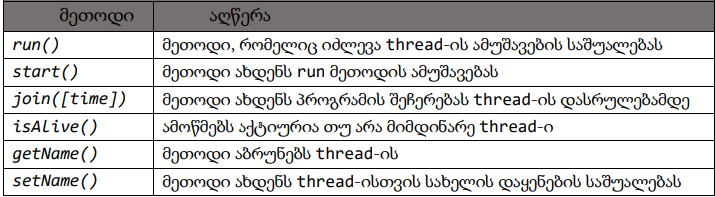

In [ ]:
"""
thread-მა რომ განახორციელოს საკუთარი დანიშნულება აუცილებელია მისი შექმნის შემდეგ
მან გამოიძახოს მეთოდი start(), ხოლო იმისათვის, რომ პროგრამამ მასში განსაზღვრულ
threadზე ადრე არ დაასრულოს საქმიანობა საჭიროა ის დაელოდოს ამუშავებული thread-ის დასრულებას
რისთვისაც thread-მა უნდა გამოიძახოს მეთოდი join().
მაშასადამე, წინა პუნქტში განსაზღვრული thread-ების ნორმალური საქმიანობის
უზრუნველსაყოფად საჭიროა კოდის შევსება შემდეგი კოდის ფრაგმენტით:
t1.start()
t1.join()
t2.start()
t2.join()
"""

thread-ის გამოყენება გამოთვლებში

In [5]:
# data ფაილში რიცხვების ჩაწერა შემდგომი გამოთვლებისთვის

with open("data.txt", "a") as f:
  for i in range(100):
    f.write(f"{str(i)} ")
    if i%10==0:
      f.write("\n")

In [ ]:
import random as rd
import time
import threading as th


N = 1000000 # სტრიქონზე რიცხვების რაოდენობა
Row = 10 # სტრიქონების რაოდენობა
a, b = 0, 100 # შუალედის დასაწყისის და ბოლოს მნიშვნელობა
with open('data.txt', 'w', encoding='utf-8') as file:
  for _ in range(Row):
    # შევქმნათ ფაილში ჩასაწერი სტრიქონი
    st = ' '.join([str(rd.randint(a, b)) for _ in range(N)]) + "\n"
    file.write(st) # მოვახდინოთ ფაილში მონაცემის ჩაწერა

def th_func(numbers, N):
  """ ფუნქცია პარამეტრად ღებულობს რიცხვებისგან შემდგარ სტრიქონს.
  სტრიქონისგან ადგენს რიცხვების სიმრავლეს და მისთვის პოულობს
  საშუალო არითმეტიკულის მნიშვნელობას და ბეჭდავს შედეგს"""
  print(f"average = { sum( [int(number) for number in numbers.split()] ) / N }")


arr = None
with open('data.txt', 'r', encoding='utf-8') as file:
 # ყოველ სტრიქონს ჩამოვაშოროთ ახალ ხაზზე გადასვლის სიმბოლო (\n)
  arr = [ar[:-1] for ar in file.readlines()]

a = time.time() # thread-ებმა დაიწყო შესრულება
for ob in arr:
  t = th.Thread(target=th_func, args=(ob,N))
  t.start()
b = time.time() # thread-ებმა დაასრულა შესრულება


c = time.time() # დაიწყო კოდის პირდაპირი შესრულება
for st in arr:
 print(f"average = { sum([ int(num) for num in st.split() ]) / N } ")
d = time.time() # დასრულდა კოდის პირდაპირი შესრულება

In [15]:
print(b-a)
print(d-c)

1.2759990692138672
3.4310219287872314


სამომხმარებლო thread კლასი

In [14]:
"""
Python ენაში შესაძლებელია მომხმარებელმა განსაზღვროს საკუთარი thread-ების კლასი
(MyThread). ამისათვის საჭიროა მან მოახდინოს კლასის შექმნა, რომელის მემკვიდრე იქნება Thread
კლასის. ამ შემხვევაში საჭიროა MyThread კლასში მოხდეს run() მეთოდის განსაზღვრა
(გადატვირთვა), რომელიც უზრუნველყოფს start() მეთოდის გამოყენებით thread ობიექტის
ამუშავებისას run() მეთოდით მისი საქმიანობის განსაზღვრას.
"""

In [16]:
from threading import Thread
class myThread(Thread):
  d = {} # კლასის დონის წევრი (სტატიკური წევრი)
  def __init__(self, st, n):
    """ კლასის კონსტრუქტორი """
    super().__init__()
    self.name = self.getName()
    self.arr = [int(num) for num in st.split()]
    self.arrSize = n
  def average(self):
    """ მეთოდი ითვლის შესაბამისი ატრიბუტის საშუალო არითმეტიკულს """
    myThread.d[self.name] = sum(self.arr) / self.arrSize
  def __del__(self):
    """ კლასის დესტრუქტორი """
    print(f"\tAverage value = { myThread.d[self.name] }")
    print(f"{self.name} finished.")
  def run(self):
    """ მეთოდი, რომელიც ახდენს thread-ის ამუშავებას """
    print(f"{self.name} started: ")
    self.average()

thread-ების სინქრონიზაცია

In [ ]:
"""
პროგრამულ კოდში thread-ბის გამოყენებას არ შეიძლება ჰქონდეს უარყოფითი ეფექტი, თუ
thread-ები იყენებენ საერთო მეხსიერებას მხოლოდ კითხვის შესაძლებლობით. პრობლემა
წარმოიშობა იმ შემთხვევაში, როდესაც საერთო მეხსიერებაში საჭიროა მნიშვნელობის შეცვლა.
thread-ების მიერ გამოყენებულ საერთო მეხსიერებას კრიტიკული სექცია ეწოდება. რამდენიმე
thread-ის მიერ კრიტიკულ სექციაზე მიმართვისას შეიძლება წარმოიშვას სიტუაცია, რომლის
დროსაც ყველა thread-ის მიერ მნიშვნელობის შეცვლის მცდელობის შემთხვევაში მოხდა მხოლოდ
„ბოლოს“ შესრულებული thread-ის მიერ განხორციელებული ცვლილების შენახვა. ამ სიტუაციას
შეჯიბრის მდგომარეობა ეწოდება.
"""

In [19]:
from threading import Thread
x = 0 # გლობალური ცვლადი
N = 500000
def inc_glob_value():
  """ მეთოდი ახდენს გლობალური ცვლადის მნიშვნელობის შეცვლას """
  global x # ხაზს ვუსვამთ, რომ ცვლადი გლობალურია
  x += 1
def thr_func(n):
  """ მეთოდი ახდენს გლობალური ცვლადის მნიშვნელობის გაზრდას 500000-ჯერ"""
  for _ in range(n):
    inc_glob_value()
def main():
  """ მეთოდი ახდენს 2 thraed-ის მეშვეობით გლობალური ცვლადის მნიშვნელობის გაზრდას"""
  global x
  x = 0
  t1 = Thread(target=thr_func, args=(N,))
  t2 = Thread(target=thr_func, args=(N,))
  t1.start()
  t2.start()
  t1.join()
  t2.join()
if __name__ == "__main__":
  # მოვახდინოთ main() მეთოდის რამდენიმეჯერ ამუშავება
  for i in range(5):
    main()
    print(f"After Iteration { i }: x = { x } ")

After Iteration 0: x = 1000000 
After Iteration 1: x = 1000000 
After Iteration 2: x = 1000000 
After Iteration 3: x = 1000000 
After Iteration 4: x = 1000000 


In [ ]:
"""
წარმოქმნილი სიტუაციიდან გამოსავალს წარმოადგენს thread-ების მიმართ სინქრონიზაციის
მექანიზმის გამოყენება. Python ენაში ამ მიზნით განსაზღვრულია რამდენიმე შესაძლებლობა. ჩვენ
განვიხილავთ სინქრონიზაციის Lock და RLock მექანიზმს. Lock მექანიზმი მცირე რაოდენობის
სამუშაოს შემთხვევაში არ ქმნის პრობლემას, მაგრამ უფრო მასშტაბური სამუშაოების შემთხვევაში
კი შეიძლება წარმოიშვას გარკვეული პრობლემები. ასეთ შემთხვევაში შეიძლება გამოყენებული
RLock მექანიზმი. ორივე მექანიზმში განსაზღვრულია ერთიდაიმავე სახელის მქონე ორი მეთოდი:
1.acquire() - რომელიც ახდენს კრიტიკული სექციის ჩაკეტვას, როცა მიმდინარე thread-ი
ახდენს შესაბამისი ცვლადის მნიშვნელობის შეცვლას. მეთოდის გამოყენება უნდა მოხდეს
უშუალოდ შესაბამის ცვლადზე ცვლილების განხორციელებამდე;
2.release() - რომელიც მიმდინარე thread-ის მხრიდან კრიტიკულ სექციაზე შესაბამისი
ცვლილების განხორციელების შემდეგ ხელმისაწვდომს ხდის კრიტიკულ სექციას. მეთოდის
გამოყენება უნდა მოხდეს უშუალოდ შესაბამის ცვლადზე ცვლილების განხორციელების
შემდეგ;
"""

In [ ]:
!pip install threading

In [ ]:
from threading import Thread
import threading
from threading import Thread
x = 0 # გლობალური ცვლადი
N = 500000
lock = threading.RLock()
def inc_glob_value():
  """ მეთოდი ახდენს გლობალური ცვლადის მნიშვნელობის შეცვლას """
  global x # ხაზს ვუსვამთ, რომ ცვლადი გლობალურია
  x += 1
def thr_func(lock, n):
  for _ in range(n):
    lock.acquire()
    inc_glob_value()
    lock.release()
def main():
  """ მეთოდი ახდენს 2 thraed-ის მეშვეობით გლობალური ცვლადის მნიშვნელობის გაზრდას"""
  global x
  x = 0
  t1 = Thread(target=thr_func, args=(N,))
  t2 = Thread(target=thr_func, args=(N,))
  t1.start()
  t2.start()
  t1.join()
  t2.join()
if __name__ == "__main__":
  # მოვახდინოთ main() მეთოდის რამდენიმეჯერ ამუშავება
  for i in range(5):
    main()
    print(f"After Iteration { i }: x = { x } ")